# Coursework 2 - ACF  #

This question is associated with the core module Analytical and Computational foundations (ACF).

### Marks 
- There are 3 subquestions, each is worth 30 marks.
- The number of marks asssociated with test-cell is indicated in a comment at the top of that cell.
- The number of marks associated to a manually marked taks. (like drawing a graph) is indicated in the text immediately above this cell. 

#### How to Answer
Write your code in the "answer" cell where it says "# YOUR CODE HERE"
and remove both the line "# YOUR CODE HERE" and the line "raise NotImplementedError()"

**Important**: Do not change the name or remove the existing function and write all your code "inside" the existing function, i.e. with at least one-tab's indentation.


When you have written your code you should evaluate the cell and then evaluate the "Test" cells following it. If you don't see any errors then your code is (hopefully) correct and you can go on to the next question. 

If you see some errors then you have to go back and edit your code and try to fix the "bug". 


## Introduction
The Secant Method can be used to find a root, $x_{∗}$, of a function $f(x)$ so that $f(x_{∗}) = 0$. This method is an adaptation of Newton’s method, where the derivative is estimated using the approximation:

$$
f′(x_k) \simeq \frac{f(x_k) − f(x_{k−1})}{x_k − x_{k−1}}.
$$

In the Secant Method a sequence of successive estimates for $x_{∗}$, labelled $\{x_k\}_{k\ge1}$, are calculated using the formula

$$
x_{k+1} =x_{k} − \frac{x_k −x_{k−1}}{f(x_k) - f(x_{k-1})}f(x_k).
$$

Geometrically $x_{k+1}$ is obtained from $x_k$ and $x_{k−1}$ by intersecting the straight line through $\big( x_k, f(x_k)\big)$ and $\big( x_{k+1}, f(x_{k+1}) \big)$ with the $x$-axis. Since each calculation of the new estimate, $x_{k+1}$, requires the values of the previous two estimates, $x_k$ and $x_{k−1}$, we must specify $x_0$ and $x_1$ initially, choosing values that are close to the root we seek. Ideally, we should choose $x_0$ and $x_1$ in a similar way to the initial endpoints of an interval for the bisection method, such that $f(x) = 0$ precisely once in the interval $(x_0,x_1)$, though this is not necessary for the secant method to work. 


**(a) [30 Marks]**

Write a function, 'secant_method', which takes as input a function $f$, two real numbers $x_0$ and $x_1$, a positive real number $tol$ and a positive integer $k_{max}$. This function should implement the Secant Method to find a root of a function $f$ using the two starting points $x_0$ and $x_1$. Successive estimates should be calculated until the relative error $e_k$ is less than $tol$ or $k>k_{max}$. 
Recall that 
$$
e_k = \left| \frac{x_k - x_{k-1}}{x_k} \right|.
$$
- If no root is found an *ArithmeticError* should be raised.
- If $tol\le0$ then a *ValueError* sould be raised.
- If $k_{max}\le 0$ then a *ValueError* should be raised.
- If $x_0 == x_1$ then a *ValueError* should be raised. 
- Otherwise the function should return a tuple $(x_N,e_N,N)$ consisting of the final approximation, $x_{N}$, the estimated relative error, $e_N$ and the index of the approximation, $N$.


In [9]:
def secant_method(f,x0,x1,tol,kmax):
    # YOUR CODE HERE
    k = 1
    # ERRORS AND TESTS
    def Errors(x0,x1,tol,kmax,k):
        if tol <= 0:
            raise ValueError()
        if kmax <= 0:
            raise ValueError()
        if x0 == x1:
            raise ValueError()
        if k > kmax:
            raise ArithmeticError()
    
    
    def Root_Found(x1,x0,tol):
        ek = abs((x1-x0)/x1)
        if ek < tol:
            return True
        else:
            return False
        
    while 1 == 1:
        
        Errors(x0,x1,tol,kmax,k)
        if Root_Found(x1,x0,tol) == True:
            return (x1,abs((x1-x0)/x1),k)
        
        newx = x1 - ((x1-x0)/(f(x1)-f(x0)))*f(x1)
        
        x0 = x1
        x1 = newx
        k+=1
        
    raise NotImplementedError()

In [10]:
# Test that the algorithm return a tuple of length 3
# Marks: 5
from nose.tools import assert_equal
import numpy as np
assert_equal(type(secant_method(np.sin,3,4,1e-12,100)),tuple)
assert_equal(len(secant_method(np.sin,3,4,1e-12,100)),3)

In [11]:
# Tests that the algorithm find the zero at pi of sin(x)
# Marks: 5
from nose.tools import assert_almost_equal
import numpy as np
assert_almost_equal(secant_method(np.sin,3,4,1e-12,100)[0],np.pi,delta=1e-10)


In [12]:
# Tests that the algorithm raises ArithmeticError if no zero is found
# Marks: 5
from nose.tools import assert_raises
import numpy as np
# Test that exp has no zero
assert_raises(ArithmeticError,secant_method,np.exp,3,4,1e-12,100)

In [13]:
# Tests that the algorithm raises ValueError if tol is 0
# Marks: 5
from nose.tools import assert_raises
import math
import numpy as np
assert_raises(ValueError,secant_method,np.sin,3,4,0.0,100)

In [14]:
# Tests that the algorithm raises ValueError if x0=x1
# Marks: 5
from nose.tools import assert_raises
import math
import numpy as np
assert_raises(ValueError,secant_method,np.sin,3,3,1e-10,-100)

In [15]:
# Tests that the algorithm can find roots of another function
# Marks: 5

**b) [30 Marks]**

Modify the function in (a) so that it takes the same input, i.e. instead returns a list of approximations: 

Write a function, 'secant_method_list', which takes as input a function $f$, two real numbers $x_0$ and $x_1$, a positive real number $tol$ and a positive integer $k_{max}$. This function should implement the Secant Method to find a list of approximations to the root of a function $f$ using the two starting points $x_0$ and $x_1$. Successive estimates should be calculated until the relative error $e_k$ is less than $tol$ or $k>k_{max}$. 
Recall that 
$$
e_k = \left| \frac{x_k - x_{k-1}}{x_k} \right|.
$$
Input and exception handling should be as in (a), i.e.
- If no root is found an *ArithmeticError* should be raised.
- If $tol\le0$ then a *ValueError* sould be raised.
- If $k_{max}\le 0$ then a *ValueError* should be raised.
- If $x_0 == x_1$ then a *ValueError* should be raised. 
- Otherwise the function should return a list of tuples of the form 

$$[ (x_0,f(x_0)), (x_1,f(x_1)), ... , (x_N,f(x_N))].$$

where the final tuple is the last approximation and satisfies 
$$\left| \frac{x_N - x_{N-1}}{x_N} \right| < e.$$


In [26]:
def secant_method_list(f,x0,x1,tol,kmax):
    # YOUR CODE HERE
    k = 1
    l = [(x0,f(x0)),(x1,f(x1))]
    # ERRORS AND TESTS
    def Errors(x0,x1,tol,kmax,k):
        if tol <= 0:
            raise ValueError()
        if kmax <= 0:
            raise ValueError()
        if x0 == x1:
            raise ValueError()
        if k > kmax:
            raise ArithmeticError()
    
    
    def Root_Found(xN,xN1,tol):
        ek = abs((xN-xN1)/xN)
        if ek < tol:
            return True
        else:
            return False
        
    while 1 == 1:
        
        Errors(l[k-1][0],l[k][0],tol,kmax,k)
        if Root_Found(l[k][0],l[k-1][0],tol) == True:
            return l
        
        newx = l[k][0] - ((l[k][0] - l[k-1][0])/(l[k][1] - l[k-1][1]))*l[k][1]
        l.append((newx,f(newx)))        
        k+=1
        
    raise NotImplementedError()

In [27]:
# Tests that the algorithm returns a list of tuples and that the last element is an approximation of a zero.
# Marks: 5
from nose.tools import assert_equal
import numpy as np
# Check that the return value has type list 
assert_equal(type(secant_method_list(np.sin,3,4,1e-12,100)),list)
# Check that return value is a list of tuples of length 2 
assert_equal(type(secant_method_list(np.sin,3,4,1e-12,100)[0]),tuple)
# Check that the tuple has length 2
assert_equal(len(secant_method_list(np.sin,3,4,1e-12,100)[0]),2)


In [28]:
# Tests that the first element in the returned list is the starting x0
# Marks: 5
from nose.tools import assert_equal
import numpy as np
assert_equal(secant_method_list(np.sin,3,4,1e-12,100)[0][0],3)

In [29]:
# Tests that the next-to last approximation is close but not too close 
# Marks: 5
from nose.tools import assert_almost_equal
import numpy as np
assert_almost_equal(secant_method_list(np.sin,3,4,1e-12,100)[-2][0],np.pi,delta=1e-10)



In [30]:
# Tests that the last approximation is closer but not too close 
# Marks: 5
from nose.tools import assert_almost_equal
import numpy as np
assert_almost_equal(secant_method_list(np.sin,3,4,1e-12,100)[-2][0],np.pi,delta=1e-12)

In [31]:
# Tests that the algorithm can find roots of another function
# Marks: 5

In [32]:
# Tests that the algorithm can find roots of another function
# Marks: 5

**c) [30 Marks]**

Consider the rational function
$$
f(x) = \frac{x^3-x^2+2x+1}{3x^2+2}
$$

Use the function from b) with initial approximations $x_0=-2$ and $x_1=1$ to compute a list of approximations, $x_0,x_1,\ldots,x_N$ to the unique real zero of $f$ (which lies between $x_0$ and $x_1$). 

Illustrate the Secant Method by plotting 

- a) The curve of $f$.
- b) The $x$-axis.
- c) The five points $z_i=(x_i,f(x_i))$ for $0\le i\le 4$ on the curve,
- d) The four straight lines (secants) between $z_0$ and $z_1$, $z_1$ and $z_2$, $z_2$ and $z_3$, and $z_3$ and $z_4$.

The plot should have the following properties:
- size (20,10),
- be limited in both $x$ and $y$-directions in such a way that the relevant parts of the graphs and intersections are clearly visible. 
- have title "Secant Method"
- have x-label "x"
- have y-label "y"

Insert the plotting code in the cell below and execute the plot. 

*Note:* 
- The convergence for these particular starting values is slow in the beginning so the first few points will not clearly illustrate the actual convergence. 
- If you couldn't complete the function `secant_method_list` in part (a) you can use the list of $x_k$ values below: 

```
xk_list = [(-2, -0.8823529411764706), (1, 0.6), (-0.2142857142857142, 0.43565270935960626), (-3.43312101910829, -1.2071053485428982), (-1.067907655010679, -0.6282446220268515), (1.4990873195554006, 0.5125366680719312), (0.34577330341514423, 1.0913866439007789), (2.5202771748832404, 0.5944232424737134), (5.121224525005979, 1.126731007706626), (-0.38417708699829944, 0.017198731189609955), (-0.4695156791417744, -0.13974998009946765), (-0.3935286483734805, -0.0017696204621476153), (-0.39255410239564087, 0.00018620814380429187), (-0.3926468857801528, -2.0908434934148662e-07), (-0.3926467817149128, -2.465352397328274e-11), (-0.39264678170264083, 0.0)]
```


[-2, 1, -0.2142857142857142, -3.43312101910829, -1.067907655010679]
[-0.8823529411764706, 0.6, 0.43565270935960626, -1.2071053485428982, -0.6282446220268515]


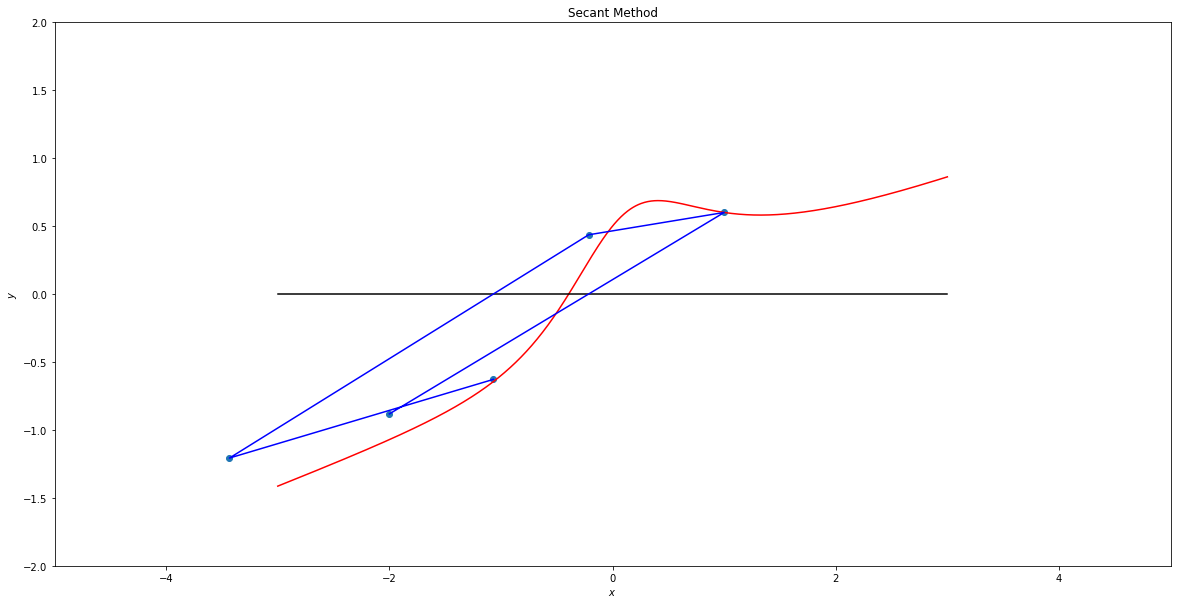

In [33]:
# YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return ((x**3) - (x**2) + (2*x) + 1)/(3*(x**2) + 2)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
x = np.linspace(-3,3,1000)
fx = ax.plot(x,f(x),"red")
x_axis = ax.plot(x,np.zeros(1000),'k')

z = [(-2, -0.8823529411764706), (1, 0.6), (-0.2142857142857142, 0.43565270935960626), (-3.43312101910829, -1.2071053485428982), (-1.067907655010679, -0.6282446220268515), (1.4990873195554006, 0.5125366680719312), (0.34577330341514423, 1.0913866439007789), (2.5202771748832404, 0.5944232424737134), (5.121224525005979, 1.126731007706626), (-0.38417708699829944, 0.017198731189609955), (-0.4695156791417744, -0.13974998009946765), (-0.3935286483734805, -0.0017696204621476153), (-0.39255410239564087, 0.00018620814380429187), (-0.3926468857801528, -2.0908434934148662e-07), (-0.3926467817149128, -2.465352397328274e-11), (-0.39264678170264083, 0.0)]
zx = []
zy = []
for n in range(5):
    zx.append(z[n][0])
    zy.append(z[n][1])
    
print(zx)
print(zy)

z_scatter = ax.scatter(zx,zy)
z_lines = ax.plot(zx,zy,"blue")


ax.set_xlim(-5,5)
ax.set_ylim(-2,2)

ax.title.set_text("Secant Method")
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')


plt.savefig("graph.png")

[-2.0, 1.0, -0.0769230769230771, -2.51546391752577, -0.6852266302792829]
[-1.0714285714285714, 0.6, 0.416196706519287, -1.2522345577270175, -0.34082168537590435]


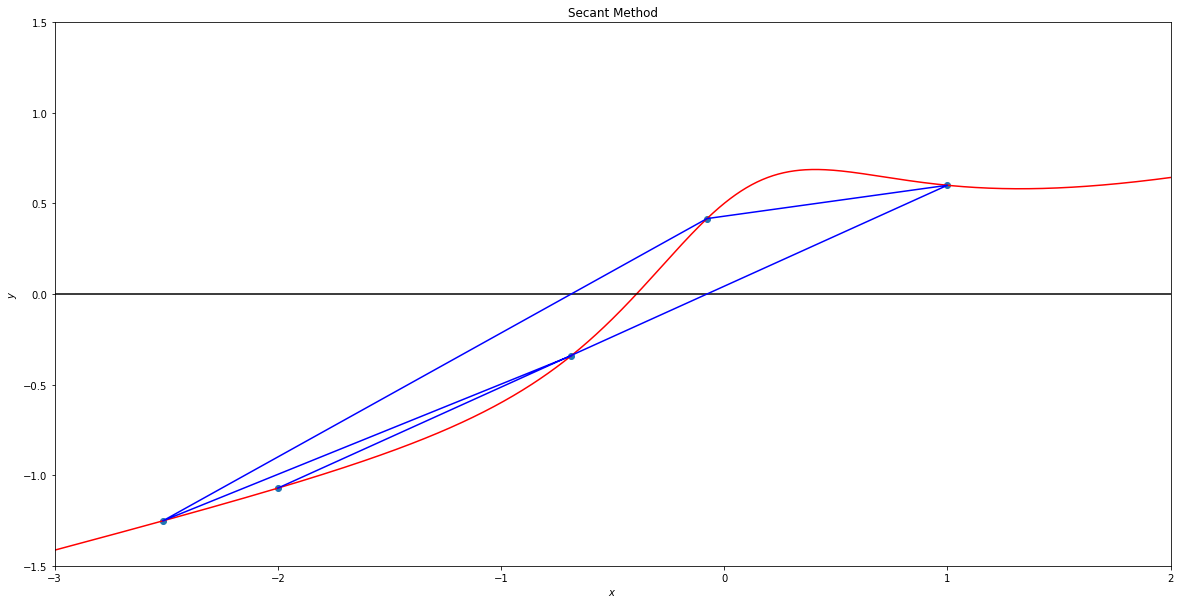

In [39]:
# YOUR CODE HERE

import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (x**3 - x**2 + 2*x + 1)/(3*(x**2) + 2)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
x = np.linspace(-3,3,1000)
fx = ax.plot(x,f(x),"red")
x_axis = ax.plot(x,np.zeros(1000),'k')

z = np.array(secant_method_list(f, -2 , 1 , 1e-12, 100))
zx = []
zy = []
for n in range(5):
    zx.append(z[n][0])
    zy.append(z[n][1])
    
print(zx)
print(zy)

z_scatter = ax.scatter(np.array(zx),np.array(zy))
z_lines = ax.plot(np.array(zx),np.array(zy),"blue")


ax.set_xlim(-3,2)
ax.set_ylim(-1.5,1.5)

ax.title.set_text("Secant Method")
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')


plt.savefig("graph.png")

In [35]:
np.array(secant_method_list(f, -2 , 1 , 1e-12, 100))

array([[-2.00000000e+00, -1.07142857e+00],
       [ 1.00000000e+00,  6.00000000e-01],
       [-7.69230769e-02,  4.16196707e-01],
       [-2.51546392e+00, -1.25223456e+00],
       [-6.85226630e-01, -3.40821685e-01],
       [-8.11722612e-04,  4.99187454e-01],
       [-4.07535078e-01, -1.95498065e-02],
       [-3.92206773e-01,  5.80400504e-04],
       [-3.92648723e-01, -2.56063575e-06],
       [-3.92646782e-01, -3.22005794e-10],
       [-3.92646782e-01,  1.80339735e-16],
       [-3.92646782e-01,  4.50849338e-17]])